In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from tqdm import tqdm_notebook
from pprint import pprint
from matplotlib.ticker import MultipleLocator

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_long = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_long.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

633

In [109]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
c= "London"
query_url = f"{base_url}appid={api_key}&q={c}&units={units}"
response1 = requests.get(query_url).json()
# pprint(response1)

In [112]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Lists to store information once loop runs
city_list = []
cloud_list = []
country_list = []
date_list = []
humid_list = []
lat_list = []
long_list = []
temp_list = []
wind_list = []

r=1
s=1

print('Beginning Data Retrieval')
print('-----------------------------')

for c in cities:
    query_url = f"{base_url}appid={api_key}&q={c}&units={units}"
    response = requests.get(query_url).json()

    try:  
        Name = response["name"]
        Cloudiness = response["clouds"]["all"]
        Country = response["sys"]["country"]
        Date = response["dt"]
        Humidity = response["main"]["humidity"]
        Latitude = response["coord"]["lat"]
        Longitude = response["coord"]["lon"]
        Temperature = response["main"]["temp_max"]
        WindSpeed = response["wind"]["speed"]

        city_list.append(Name)
        cloud_list.append(Cloudiness)
        country_list.append(Country)
        date_list.append(Date)
        humid_list.append(Humidity)
        lat_list.append(Latitude)
        long_list.append(Longitude)
        temp_list.append(Temperature)
        wind_list.append(WindSpeed)
        print(f"Processing Record {r} of Set {s} | {Name}")
        r+=1
    except KeyError:
        city_list.append('NaN')
        cloud_list.append('NaN')
        country_list.append('NaN')
        date_list.append('NaN')
        humid_list.append('NaN')
        lat_list.append('NaN')
        long_list.append('NaN')
        temp_list.append('NaN')
        wind_list.append('NaN')
        print('City not found. Skipping...')
    if r == 11:
        r=1
        s+=1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Punta Arenas
City not found. Skipping...
Processing Record 2 of Set 1 | San Lorenzo
Processing Record 3 of Set 1 | Port Blair
City not found. Skipping...
Processing Record 4 of Set 1 | San Vicente
Processing Record 5 of Set 1 | Vaini
Processing Record 6 of Set 1 | Ulety
Processing Record 7 of Set 1 | Ushuaia
Processing Record 8 of Set 1 | Rocha
Processing Record 9 of Set 1 | Danville
Processing Record 10 of Set 1 | San Rafael del Sur
Processing Record 1 of Set 2 | Oksfjord
Processing Record 2 of Set 2 | New Norfolk
Processing Record 3 of Set 2 | Provideniya
Processing Record 4 of Set 2 | Busselton
Processing Record 5 of Set 2 | Nichinan
City not found. Skipping...
Processing Record 6 of Set 2 | Kihei
City not found. Skipping...
Processing Record 7 of Set 2 | Mataura
Processing Record 8 of Set 2 | Bredasdorp
Processing Record 9 of Set 2 | Sao Mateus do Maranhao
Processing Record 10 of Set 2 | Tuktoyakt

In [118]:
## Create initial weather data frame from lists
weather_df = pd.DataFrame({"City" : city_list,
              "Cloudiness" : cloud_list,
              "Country" : country_list,
              "Date" : date_list,
              "Humidity" : humid_list,
              "Lat" : lat_list,
              "Lng" : long_list,
             "Max Temp" : temp_list,
             "Wind Speed" : wind_list})
weather_df.head()

# Output File (CSV)
output_data_file = "output_data/cities.csv"
weather_df.to_csv(output_data_file, encoding='utf-8')

In [72]:
## Remove cities with no values
weather_clean = weather_df[~weather_df.City.str.contains("NaN")]
weather_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,0,CL,1563849553,65,-53.16,-70.91,33.8,25.28
2,San Lorenzo,100,HN,1563849553,58,13.43,-87.45,79.06,2.77
3,Port Blair,70,IN,1563849553,79,11.67,92.75,83.56,20.36
5,San Vicente,40,EC,1563849553,83,-0.59,-80.41,73.4,4.7
6,Vaini,75,IN,1563849554,94,15.34,74.49,71.6,9.17


In [82]:
## Convert object columns to numbers
weather_clean[["Cloudiness", "Date","Humidity","Lat","Lng","Max Temp",
               "Wind Speed"]] = weather_clean[["Cloudiness", "Date",
                                               "Humidity","Lat","Lng","Max Temp",
                                               "Wind Speed"]].apply(pd.to_numeric)
weather_clean.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [103]:
## Time stamp current date
c_time = pd.to_datetime(datetime.now()).strftime('%Y-%m-%d')

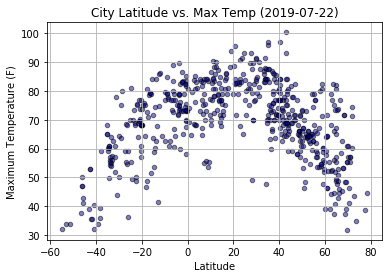

In [119]:
plot1 = weather_clean.plot.scatter(x='Lat',y='Max Temp', c='DarkBlue',alpha=0.5,
                                  edgecolors="black",
                                   title=f"City Latitude vs. Max Temp ({c_time})")
plot1.set_xlabel("Latitude")
plot1.set_ylabel("Maximum Temperature (F)")
plot1.grid()

plt.savefig('Images/LatVsTemp.png')

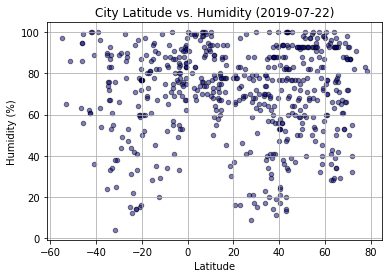

In [120]:
plot2 = weather_clean.plot.scatter(x='Lat',y='Humidity', c='DarkBlue',alpha=0.5,
                                  edgecolors="black",
                                   title=f"City Latitude vs. Humidity ({c_time})")
plot2.set_xlabel("Latitude")
plot2.set_ylabel("Humidity (%)")
plot2.grid()

plt.savefig('Images/LatVsHumidity.png')

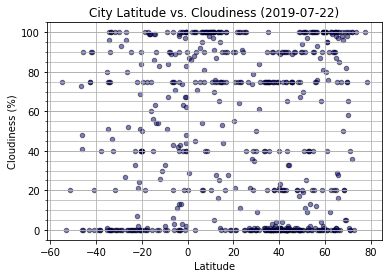

In [125]:
plot3 = weather_clean.plot.scatter(x='Lat',y='Cloudiness', c='DarkBlue',alpha=0.5,
                                  edgecolors="black",
                                   title=f"City Latitude vs. Cloudiness ({c_time})")
plot3.set_xlabel("Latitude")
plot3.set_ylabel("Cloudiness (%)")
plot3.grid()

ml = MultipleLocator(5)
plot3.yaxis.set_minor_locator(ml)
plot3.yaxis.grid(which="minor", linewidth=0.7)

plt.savefig('Images/LatVsClouds.png')

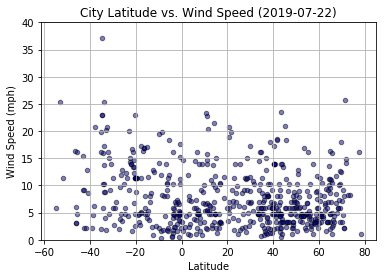

In [123]:
plot4 = weather_clean.plot.scatter(x='Lat',y='Wind Speed', c='DarkBlue',alpha=0.5,
                                  edgecolors="black",
                                   title=f"City Latitude vs. Wind Speed ({c_time})")
plot4.set_xlabel("Latitude")
plot4.set_ylabel("Wind Speed (mph)")
plot4.set_ylim(0,40)
plot4.grid()

plt.savefig('Images/LatVsWind.png')